## Descarga de datos de 47 Tucanae

Ejemplo de uso de la descarga y generación de clustering para el objeto 47 Tucanae.

### Requirements

In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
    
project_path = os.path.abspath(os.path.join(os.getcwd(), "../../src"))  # Subir un nivel
if project_path not in sys.path:
    sys.path.append(project_path)
            

from hyper_velocity_stars_detection.sources.source import AstroMetricData, AstroObject
from hyper_velocity_stars_detection.jobs.utils import read_baumgardt_catalog
from hyper_velocity_stars_detection.globular_clusters import GlobularClusterAnalysis

PATH = "../../data/report_notebook"

RADIUS_SCALE = 1
CATALOG = "gaiadr3"
FILTERS = {"ast_params_solved": 3, "ruwe": 1.4, "v_periods_used": 10, "min_parallax": 0}

/home/santhiperbolico/Documentos/UCM/tfm-ucm-code/src/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Descarga de los datos de referencia del catálogo de `Baumgardt, H., Hilker, M., Sollima, A., & Bellini, A. (2019). Mean proper motions, space orbits, and velocity dispersion profiles of Galactic globular clusters derived from Gaia DR2 data. Monthly Notices of the Royal Astronomical Society, 482(4), 5138-5155.`

In [2]:
cluster_dr2 = read_baumgardt_catalog()
cluster_dr2

,Name,parallax,e_parallax,pmRA_,e_pmRA_,pmDE,e_pmDE,RV,e_RV,rho,Rsun,e_Rsun,MAIN_ID
0,ngc 104,0.225734,0.002038,5.25,0.01,-2.53,0.01,-17.209999,0.18,0.04,4.430000,0.04,NGC_104
1,ngc 288,0.100200,0.003317,4.22,0.01,-5.65,0.01,-44.830002,0.13,0.31,9.980000,0.33,NGC_288
2,ngc 362,0.109051,0.003094,6.71,0.01,-2.51,0.01,223.259995,0.28,-0.09,9.170000,0.26,NGC_362
3,whiting 1,0.031949,NaN,-0.04,0.12,-1.78,0.08,-130.410004,1.79,-0.09,31.299999,NaN,NAME_Whiting_1
4,ngc 1261,0.064558,NaN,1.61,0.02,-2.05,0.02,71.360001,0.24,0.19,15.490000,NaN,NGC_1261
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,ngc 7089,0.095147,0.003354,3.51,0.01,-2.16,0.01,-3.720000,0.34,0.01,10.510000,0.37,M_2
150,ngc 7099,0.125000,0.008952,-0.73,0.01,-7.24,0.01,-185.190002,0.17,0.53,8.000000,0.57,M_30
151,pal 12,0.052632,NaN,-3.28,0.03,-3.31,0.03,27.910000,0.28,0.33,19.000000,NaN,Cl_Pal_12
152,pal 13,0.040323,NaN,1.64,0.09,0.25,0.07,25.870001,0.27,0.04,24.799999,NaN,GCl_124


In [3]:
CLUSTER_NAME = "ngc 104"

CACHE = True
gc_object = None

if CACHE:
    file = os.path.join(PATH, "globular_cluster_NGC_104.zip")
    try:
        gc_object = GlobularClusterAnalysis.load(file)
    except FileNotFoundError:
        print("No se ha encontrado el archivo % s" % file)

if not CACHE:
    gc_object =  GlobularClusterAnalysis.load_globular_cluster(
        name=CLUSTER_NAME,
        radius_scale=RADIUS_SCALE,
        catalog_name=CATALOG,
        **FILTERS
    )

print(str(gc_object))

Muestras seleccionadas del objeto astronómico ngc 104 con radio 1.0:
	 - df_c1 - Todas las estrellas seleccionadas: 96405.
	 - df_c2 - Las estrellas con errores de paralaje y pm menores al 10%: 16239.
	 - df_c3 - Las estrellas con un error de paralaje menor del 30% y de pm menores al 10%: 16239.
	 - df_c4 - Las estrellas con un error de paralaje menor del 10% y de pm menores al 30%.: 23393.
Se han encontrado 37 fuentes de rayos X.
Estimated number of clusters: 3
Estimated number of noise points: 1552
	 - Volumen total del cluster 0: 154.
	 - Volumen total del cluster 1: 2658.
	 - Volumen total del cluster 2: 636.



(<Figure size 1500x600 with 1 Axes>,
 <Axes: title={'center': 'CMD NGC_104'}, xlabel='bp_rp', ylabel='phot_g_mean_mag'>)

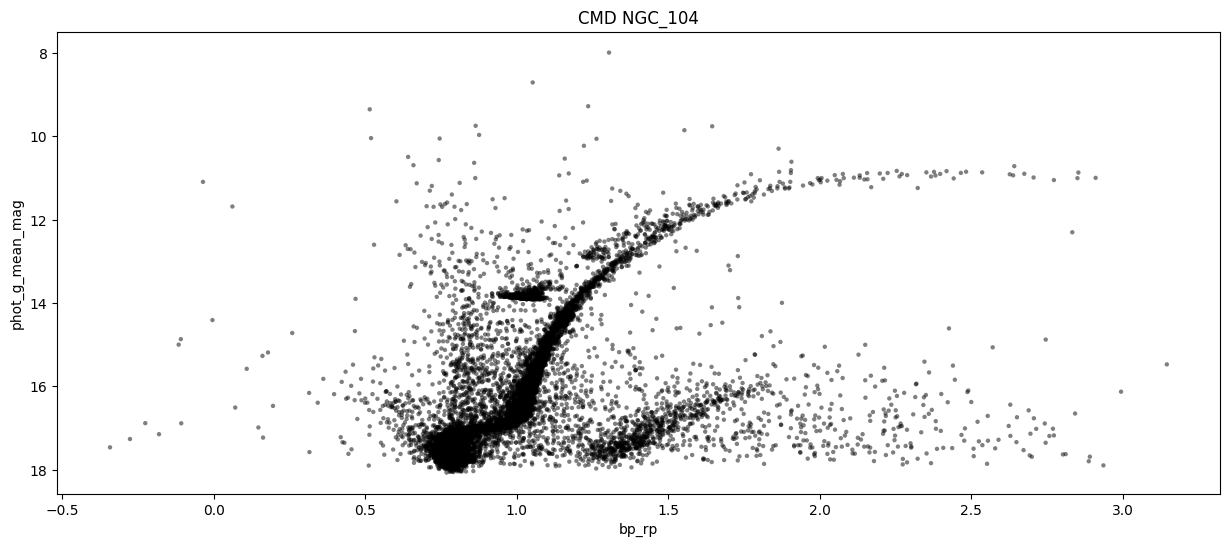

In [4]:
gc_object.plot_cmd(sample_label="df_c2")

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Cluster NGC_104'}, xlabel='l (Galactic Longitude)', ylabel='b (Galactic Latitude)'>)

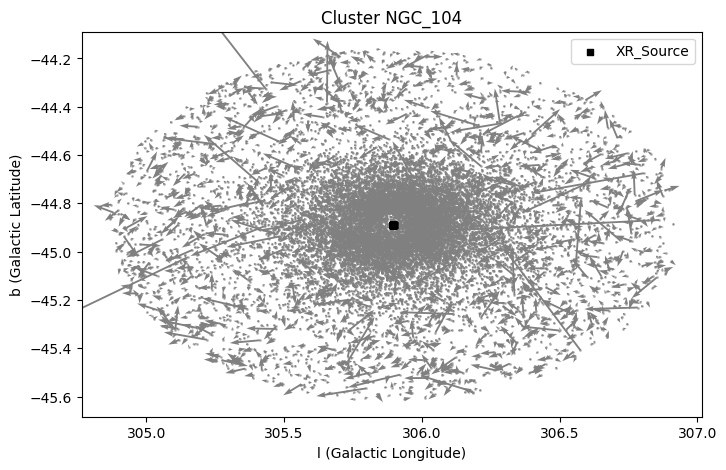

In [5]:
gc_object.plot_cluster(sample_label="df_c2")

## Clustering Methods

Se muestra un ejemplo del cálculo del clśter, el cálculo real se ha realizado en el job de `hyper_velocity_stars_detection/jobs/google_jobs/download_globular_clusters.py`.

In [6]:
reference_cluster = None
df_ref = cluster_dr2.loc[cluster_dr2.MAIN_ID == gc_object.name, ["parallax"]]
if not df_ref.empty:
    reference_cluster = df_ref.iloc[0]

In [7]:
gc_object.cluster_star_detection(max_stars_to_clus=5000, reference_cluster=reference_cluster, n_trials=10)

[I 2025-09-06 13:37:06,572] A new study created in memory with name: no-name-a3ee6b22-3705-4ac0-8f94-28812b631b70
[I 2025-09-06 13:37:06,717] Trial 0 finished with value: 0.04129234178981053 and parameters: {'params_distribution': 'hdbscan', 'hdbscan_min_cluster_size': 25, 'hdbscan_min_samples': 8, 'hdbscan_scaler_method': 'minmax', 'hdbscan_noise_method': None}. Best is trial 0 with value: 0.04129234178981053.
[I 2025-09-06 13:37:06,768] Trial 1 finished with value: 0.024954003315249308 and parameters: {'params_distribution': 'dbscan', 'dbscan_eps': 0.2919075216881615, 'dbscan_min_samples': 10, 'dbscan_scaler_method': None, 'dbscan_noise_method': None}. Best is trial 1 with value: 0.024954003315249308.
[I 2025-09-06 13:37:06,923] Trial 2 finished with value: 0.060371046781537735 and parameters: {'params_distribution': 'gaussian_mixture', 'gaussian_mixture_n_components': 8, 'gaussian_mixture_covariance_type': 'tied', 'gaussian_mixture_tol': 7.681782817622678e-05, 'gaussian_mixture_max_

ClusteringResults(df_stars=               solution_id                   DESIGNATION            SOURCE_ID  \
71320  1636148068921376768  Gaia DR3 4689829997740092032  4689829997740092032   
914    1636148068921376768  Gaia DR3 4688796113212363392  4688796113212363392   
75691  1636148068921376768  Gaia DR3 4689831986305439488  4689831986305439488   
88525  1636148068921376768  Gaia DR3 4689871744821486976  4689871744821486976   
85205  1636148068921376768  Gaia DR3 4689848655076717440  4689848655076717440   
...                    ...                           ...                  ...   
51988  1636148068921376768  Gaia DR3 4689647543252194816  4689647543252194816   
13938  1636148068921376768  Gaia DR3 4689637956871213568  4689637956871213568   
60795  1636148068921376768  Gaia DR3 4689620192879865728  4689620192879865728   
62497  1636148068921376768  Gaia DR3 4689806907994987520  4689806907994987520   
22056  1636148068921376768  Gaia DR3 4689526051501722112  4689526051501722112   



(<Figure size 1500x600 with 1 Axes>,
 <Axes: title={'center': 'CMD NGC_104'}, xlabel='bp_rp', ylabel='phot_g_mean_mag'>)

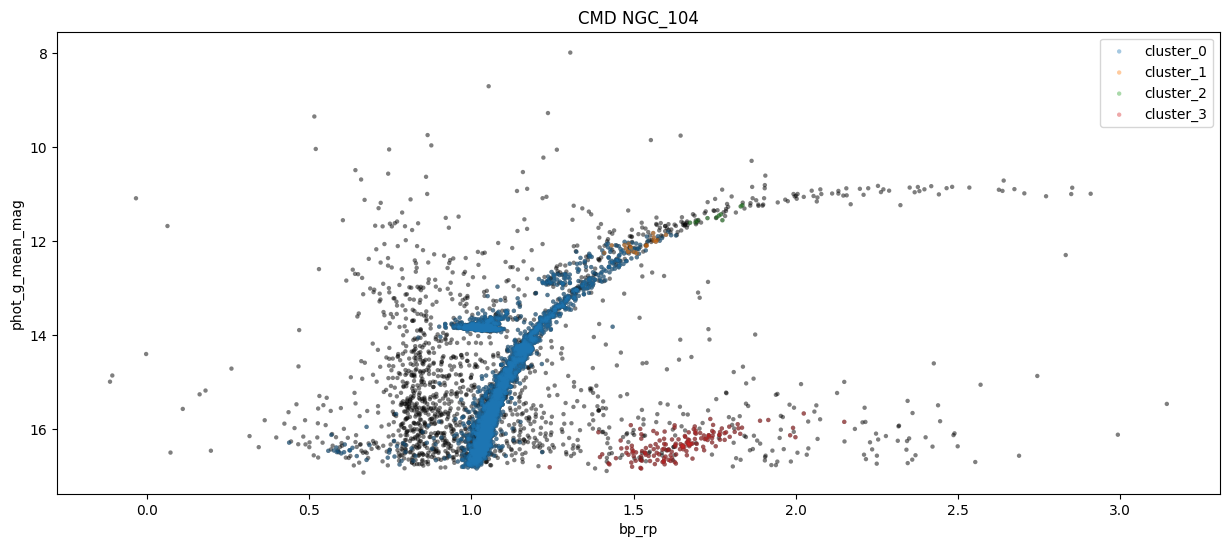

In [8]:
gc_object.plot_cmd(legend=True)

In [13]:
gc_object.clustering_results.remove_outliers_gc()[["parallax", "pmra", "pmdec"]].describe()

,parallax,pmra,pmdec
count,2651.000000,2651.000000,2651.000000
mean,0.228262,5.256834,-2.549713
std,0.029689,0.331406,0.349827
min,0.093895,4.368666,-3.610524
25%,0.212264,5.031599,-2.811432
50%,0.229241,5.254797,-2.543477
75%,0.245232,5.492663,-2.300257
max,0.335465,6.240377,-1.445753


(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Cluster NGC_104'}, xlabel='l (Galactic Longitude)', ylabel='b (Galactic Latitude)'>)

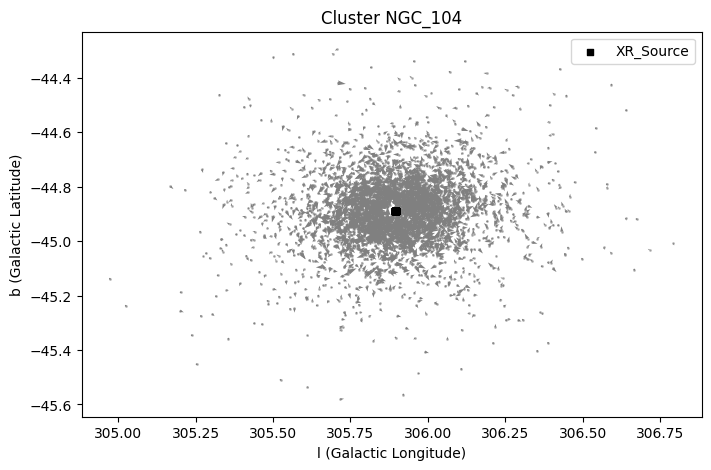

In [10]:
gc_object.plot_cluster(factor_size=12)

In [11]:
gc_object.clustering_results.gc[["pm_l", "pm_b"]].describe()

,pm_l,pm_b
count,3142.000000,3142.000000
mean,-5.583507,1.748579
std,0.353494,0.359332
min,-6.629972,0.650848
25%,-5.829607,1.507530
50%,-5.583611,1.754120
75%,-5.341774,2.001144
max,-4.498538,2.861908


In [12]:
gc_object.describe()

,parallax,pmra,pmdec,bp_rp,phot_g_mean_mag
count,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000
mean,0.228833,5.257814,-2.564099,1.088516,14.927499
std,0.038507,0.358204,0.373681,0.108098,1.173909
min,0.042712,4.177285,-3.653923,0.437447,11.809500
25%,0.210980,5.017635,-2.833526,1.031457,13.873060
50%,0.229732,5.255934,-2.563842,1.058464,14.985590
75%,0.247513,5.506255,-2.298000,1.127959,16.007012
max,0.452942,6.279662,-1.445753,1.631101,16.847569
